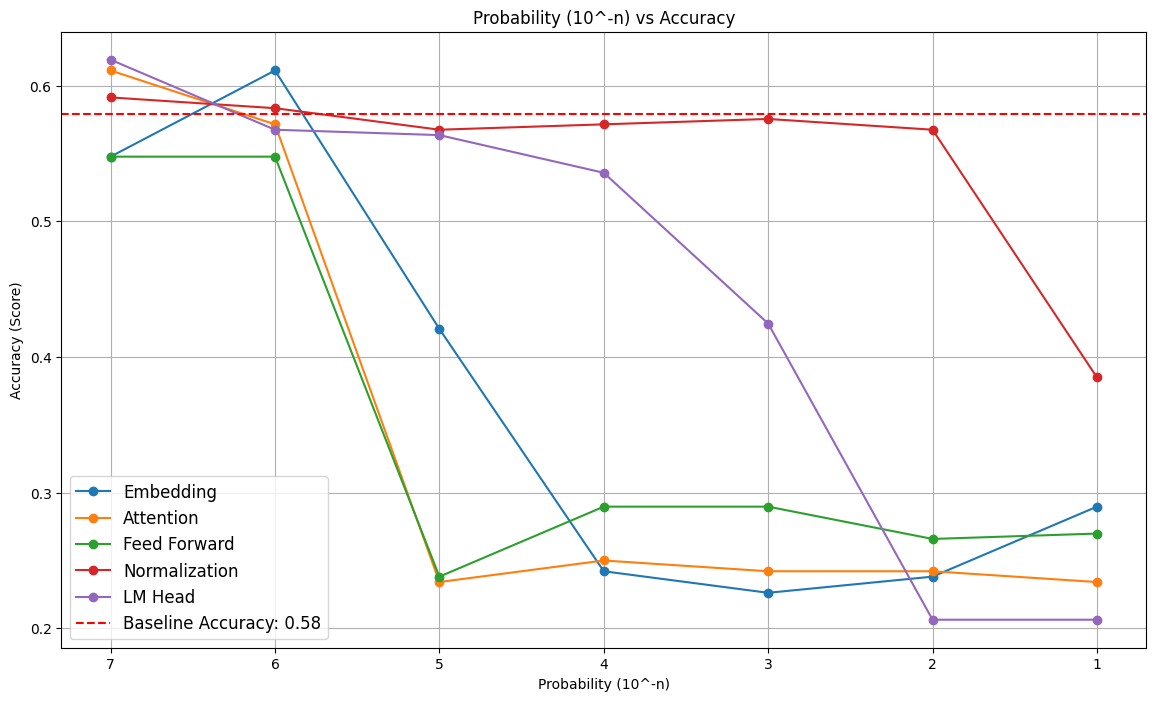

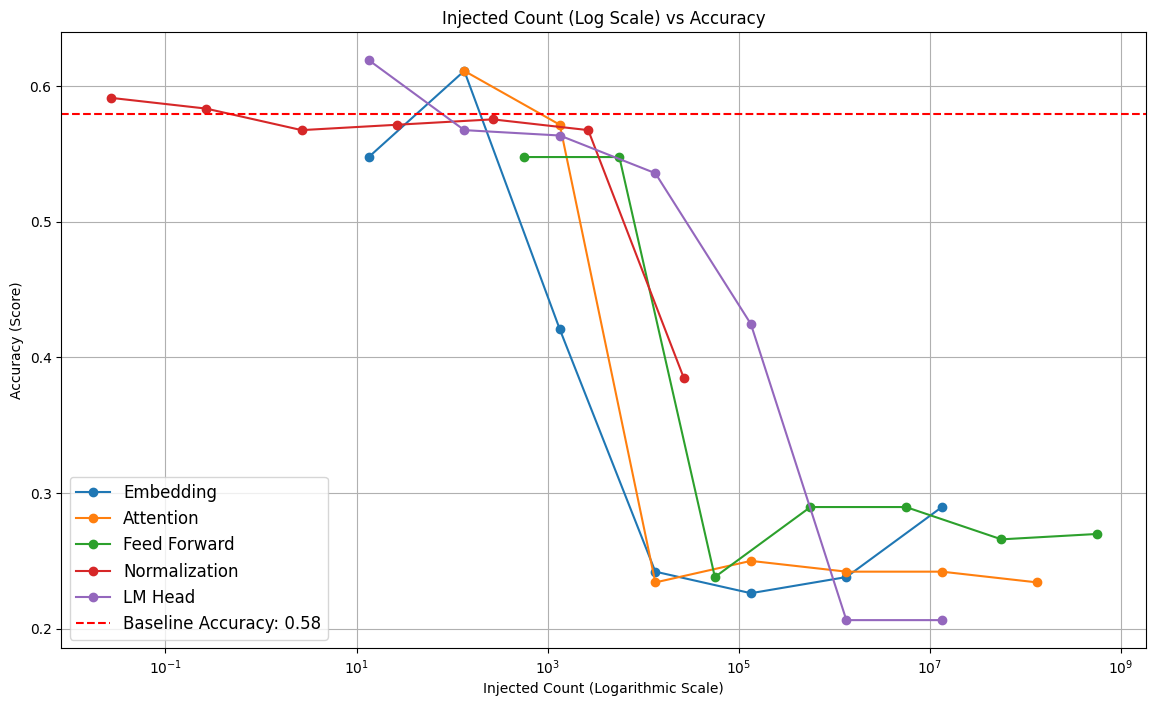

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load CSV files
embedded_df = pd.read_csv('/content/injected_embedding_results.csv')
attention_df = pd.read_csv('/content/injected_attention_results.csv')
feed_forward_df = pd.read_csv('/content/injected_feed_forward_results.csv')
normalization_df = pd.read_csv('/content/injected_normalization_results.csv')
output_df = pd.read_csv('/content/injected_output_results.csv')

baseline_accuracy = 0.5793650793650794  # Replace with actual baseline if known

# Add relative accuracy loss to each DataFrame
for df in [embedded_df, attention_df, feed_forward_df, normalization_df, output_df]:
    df['Relative Loss'] = (baseline_accuracy - df['Score']) / baseline_accuracy


# Line chart: Probability (10^-n) vs Score
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(embedded_df["Probability (10^-n)"], embedded_df["Score"], marker='o', linestyle='-', label='Embedding')
plt.plot(attention_df["Probability (10^-n)"], attention_df["Score"], marker='o', linestyle='-', label='Attention')
plt.plot(feed_forward_df["Probability (10^-n)"], feed_forward_df["Score"], marker='o', linestyle='-', label='Feed Forward')
plt.plot(normalization_df["Probability (10^-n)"], normalization_df["Score"], marker='o', linestyle='-', label='Normalization')
plt.plot(output_df["Probability (10^-n)"], output_df["Score"], marker='o', linestyle='-', label='LM Head')
plt.axhline(y=baseline_accuracy, color='red', linestyle='--', label=f'Baseline Accuracy: {baseline_accuracy:.2f}')
plt.gca().invert_xaxis()  # Invert x-axis for descending probabilities
plt.title('Probability (10^-n) vs Accuracy')
plt.xlabel('Probability (10^-n)')
plt.ylabel('Accuracy (Score)')
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Line chart: Injected Count vs Score (logarithmic scale)
plt.figure(figsize=(14, 8))  # Increase figure size
plt.plot(embedded_df["Injected Count"], embedded_df["Score"], marker='o', linestyle='-', label='Embedding')
plt.plot(attention_df["Injected Count"], attention_df["Score"], marker='o', linestyle='-', label='Attention')
plt.plot(feed_forward_df["Injected Count"], feed_forward_df["Score"], marker='o', linestyle='-', label='Feed Forward')
plt.plot(normalization_df["Injected Count"], normalization_df["Score"], marker='o', linestyle='-', label='Normalization')
plt.plot(output_df["Injected Count"], output_df["Score"], marker='o', linestyle='-', label='LM Head')
plt.axhline(y=baseline_accuracy, color='red', linestyle='--', label=f'Baseline Accuracy: {baseline_accuracy:.2f}')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Injected Count (Log Scale) vs Accuracy')
plt.xlabel('Injected Count (Logarithmic Scale)')
plt.ylabel('Accuracy (Score)')
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


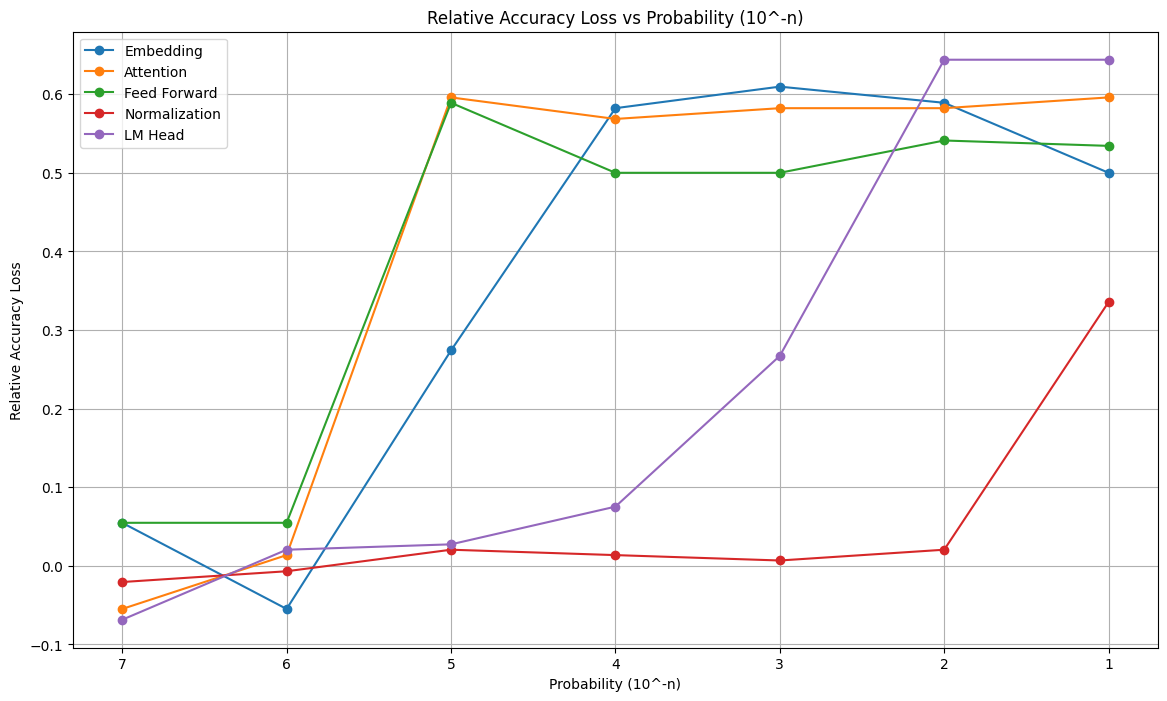

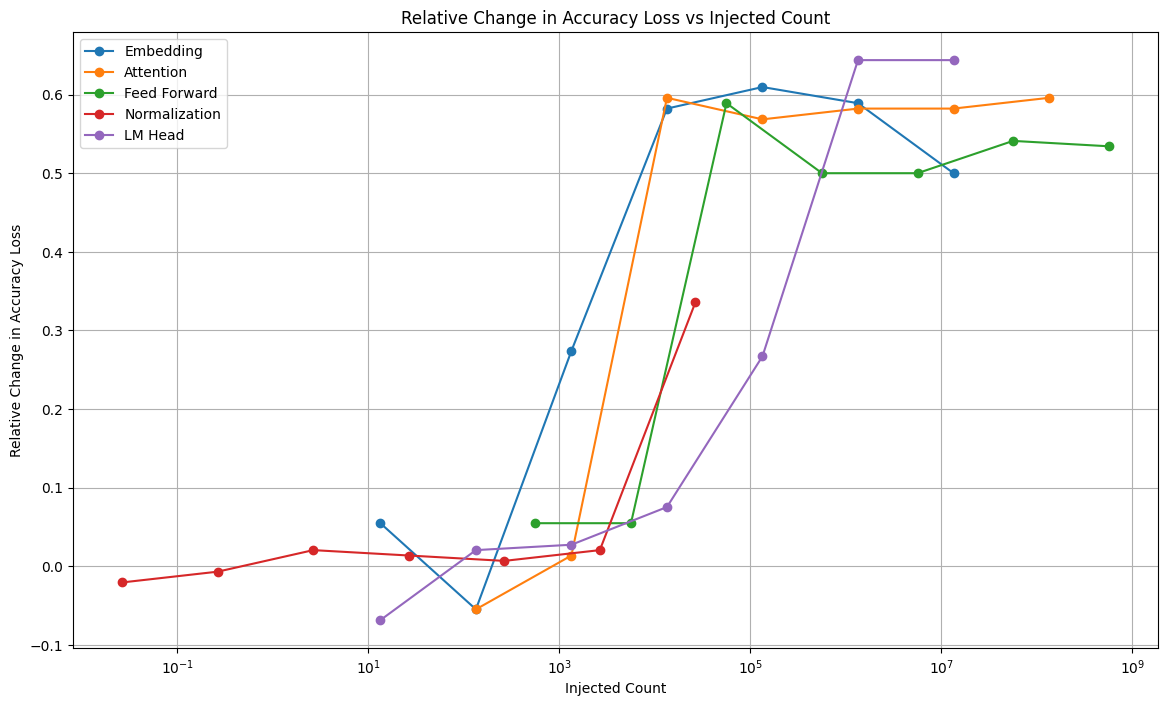

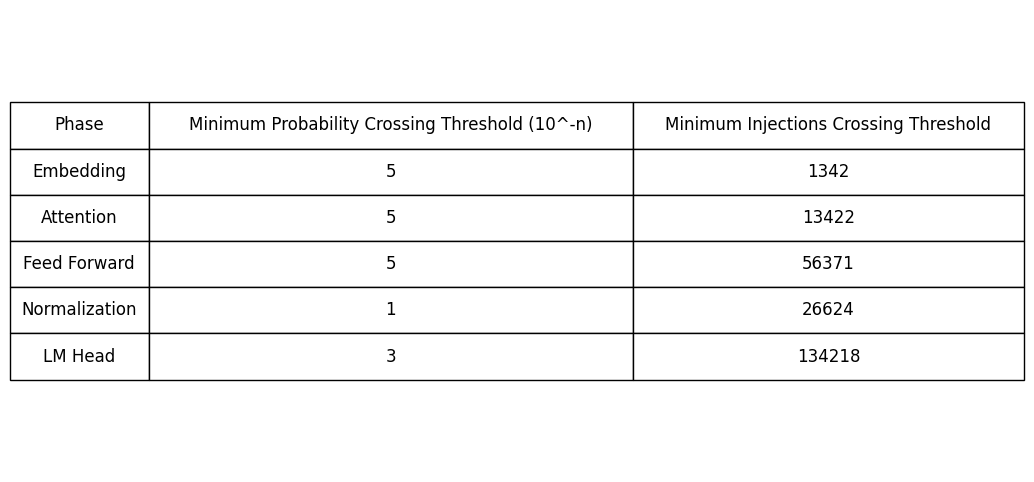

In [ ]:

# Visualize the relative accuracy loss for each phase at different probabilities
plt.figure(figsize=(14, 8))
plt.plot(embedded_df["Probability (10^-n)"], embedded_df["Relative Loss"], marker='o', linestyle='-', label='Embedding')
plt.plot(attention_df["Probability (10^-n)"], attention_df["Relative Loss"], marker='o', linestyle='-', label='Attention')
plt.plot(feed_forward_df["Probability (10^-n)"], feed_forward_df["Relative Loss"], marker='o', linestyle='-', label='Feed Forward')
plt.plot(normalization_df["Probability (10^-n)"], normalization_df["Relative Loss"], marker='o', linestyle='-', label='Normalization')
plt.plot(output_df["Probability (10^-n)"], output_df["Relative Loss"], marker='o', linestyle='-', label='LM Head')
plt.gca().invert_xaxis()  # Invert x-axis for descending probabilities
plt.title('Relative Change in Accuracy Loss vs Probability (10^-n)')
plt.xlabel('Probability (10^-n)')
plt.ylabel('Relative Change in Accuracy Loss')
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Visualize the relative accuracy loss for each phase at different injected counts
plt.figure(figsize=(14, 8))
plt.plot(embedded_df["Injected Count"], embedded_df["Relative Loss"], marker='o', linestyle='-', label='Embedding')
plt.plot(attention_df["Injected Count"], attention_df["Relative Loss"], marker='o', linestyle='-', label='Attention')
plt.plot(feed_forward_df["Injected Count"], feed_forward_df["Relative Loss"], marker='o', linestyle='-', label='Feed Forward')
plt.plot(normalization_df["Injected Count"], normalization_df["Relative Loss"], marker='o', linestyle='-', label='Normalization')
plt.plot(output_df["Injected Count"], output_df["Relative Loss"], marker='o', linestyle='-', label='LM Head')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Relative Change in Accuracy Loss vs Injected Count')
plt.xlabel('Injected Count')
plt.ylabel('Relative Change in Accuracy Loss')
plt.grid(True)
plt.legend(fontsize=10)
plt.show()




# Create a summary of thresholds
threshold = 0.5  # Example threshold for accuracy drop
results = []
for name, df in zip(['Embedding', 'Attention', 'Feed Forward', 'Normalization', 'LM Head'],
                    [embedded_df, attention_df, feed_forward_df, normalization_df, output_df]):
    threshold_crossed = df[df['Score'] < threshold]
    if not threshold_crossed.empty:
        min_prob = threshold_crossed["Probability (10^-n)"].max()
        min_injections = round(threshold_crossed["Injected Count"].min())
        results.append((name, min_prob, min_injections))
    else:
        results.append((name, 'No threshold crossing'))

# Display results
summary_df = pd.DataFrame(results, columns=['Phase', 'Minimum Probability Crossing Threshold (10^-n)', 'Minimum Injections Crossing Threshold'])

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(summary_df.columns))))

# Set custom row heights for better spacing
for i, cell in table.get_celld().items():
    cell.set_height(0.1)  # Adjust row height for more space
    cell.set_width(0.05)  # Adjust column width for more space (optional

# Show the plot
plt.show()

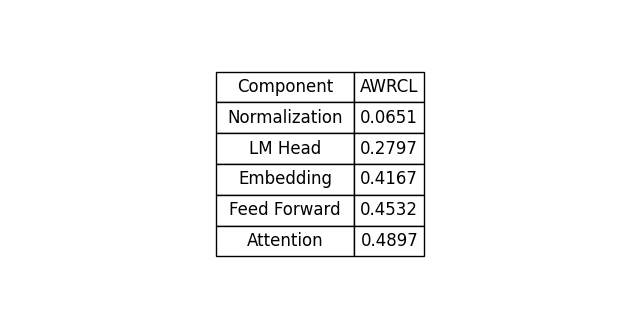

In [ ]:
# Dictionary to store AWRCL results
awrcl_results = {}

# List of components and their DataFrames
components = {
    "Embedding": embedded_df,
    "Attention": attention_df,
    "Feed Forward": feed_forward_df,
    "Normalization": normalization_df,
    "LM Head": output_df,
}

# Calculate AWRCL for each component
for name, df in components.items():
    # Sort by Probability
    df = df.sort_values(by="Probability (10^-n)")

    # Extract values
    probabilities = df["Probability (10^-n)"].values
    relative_losses = df["Relative Loss"].values

    # Calculate interval widths
    delta_probabilities = probabilities[1:] - probabilities[:-1]

    # Calculate weighted losses
    weighted_losses = relative_losses[:-1] * delta_probabilities  # Use losses at interval start

    # Calculate AWRCL
    awrcl = sum(weighted_losses) / sum(delta_probabilities)

    # Store result
    awrcl_results[name] = awrcl


# Prepare data for the table
component_names = list(awrcl_results.keys())
awrcl_values = list(awrcl_results.values())

# Create a figure for the table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# Generate the table data
table_data = [["Component", "AWRCL"]] + [[name, f"{value:.4f}"] for name, value in sorted(zip(component_names, awrcl_values), key=lambda pair: pair[1])]

# Add the table to the figure
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.5, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(table_data[0]))))

# Manually set row heights
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    cell.set_height(0.1)  # Increase height of each cell; adjust as needed

# Display the table
plt.show()

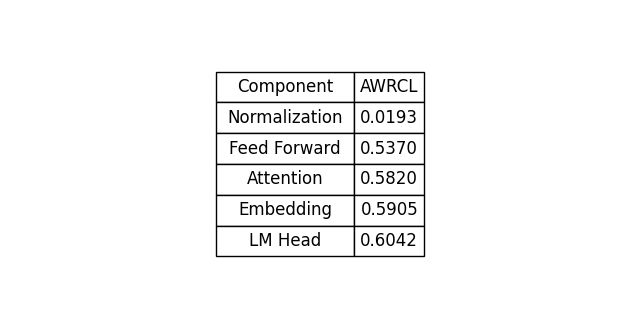

In [ ]:
# Dictionary to store AWRCL results
awrcl_results = {}

# List of components and their DataFrames
components = {
    "Embedding": embedded_df,
    "Attention": attention_df,
    "Feed Forward": feed_forward_df,
    "Normalization": normalization_df,
    "LM Head": output_df,
}

# Calculate AWRCL for each component
for name, df in components.items():
    # Sort by Injected Count
    df = df.sort_values(by="Injected Count")

    # Extract values
    injected_counts = df["Injected Count"].values
    relative_losses = df["Relative Loss"].values

    # Calculate interval widths
    delta_counts = injected_counts[1:] - injected_counts[:-1]

    # Calculate weighted losses
    weighted_losses = relative_losses[:-1] * delta_counts  # Use losses at interval start

    # Calculate AWRCL
    awrcl = sum(weighted_losses) / sum(delta_counts)

    # Store result
    awrcl_results[name] = awrcl

# Prepare data for the table
component_names = list(awrcl_results.keys())
awrcl_values = list(awrcl_results.values())

# Create a figure for the table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# Generate the table data
table_data = [["Component", "AWRCL"]] + [[name, f"{value:.4f}"] for name, value in sorted(zip(component_names, awrcl_values), key=lambda pair: pair[1])]

# Add the table to the figure
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.5, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(table_data[0]))))

# Manually set row heights
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    cell.set_height(0.1)  # Adjust as needed

# Display the table
plt.show()